In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../src')
from Model import MindReader
from InspectWeights import InspectWeights

In [3]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

# Create dummy-data

In [4]:
def generate_data():
    size = (128,2)
    N = size[0]
    first_kvadrant = np.random.normal(loc=(1,1), scale=.1, size=size)
    second_kvadrant = np.random.normal(loc=(-1,1), scale=.1, size=size)
    third_kvadrant = np.random.normal(loc=(-1,-1), scale=.1, size=size)
    fourth_kvadrant = np.random.normal(loc=(1,-1), scale=.1, size=size)
    data = np.concatenate([first_kvadrant,second_kvadrant,third_kvadrant,fourth_kvadrant])
    
    labels=np.concatenate([np.zeros(N),np.ones(N),np.ones(N)*2,np.ones(N)*3])
    return data,labels

In [5]:
data,labels = generate_data()

<IPython.core.display.Javascript object>


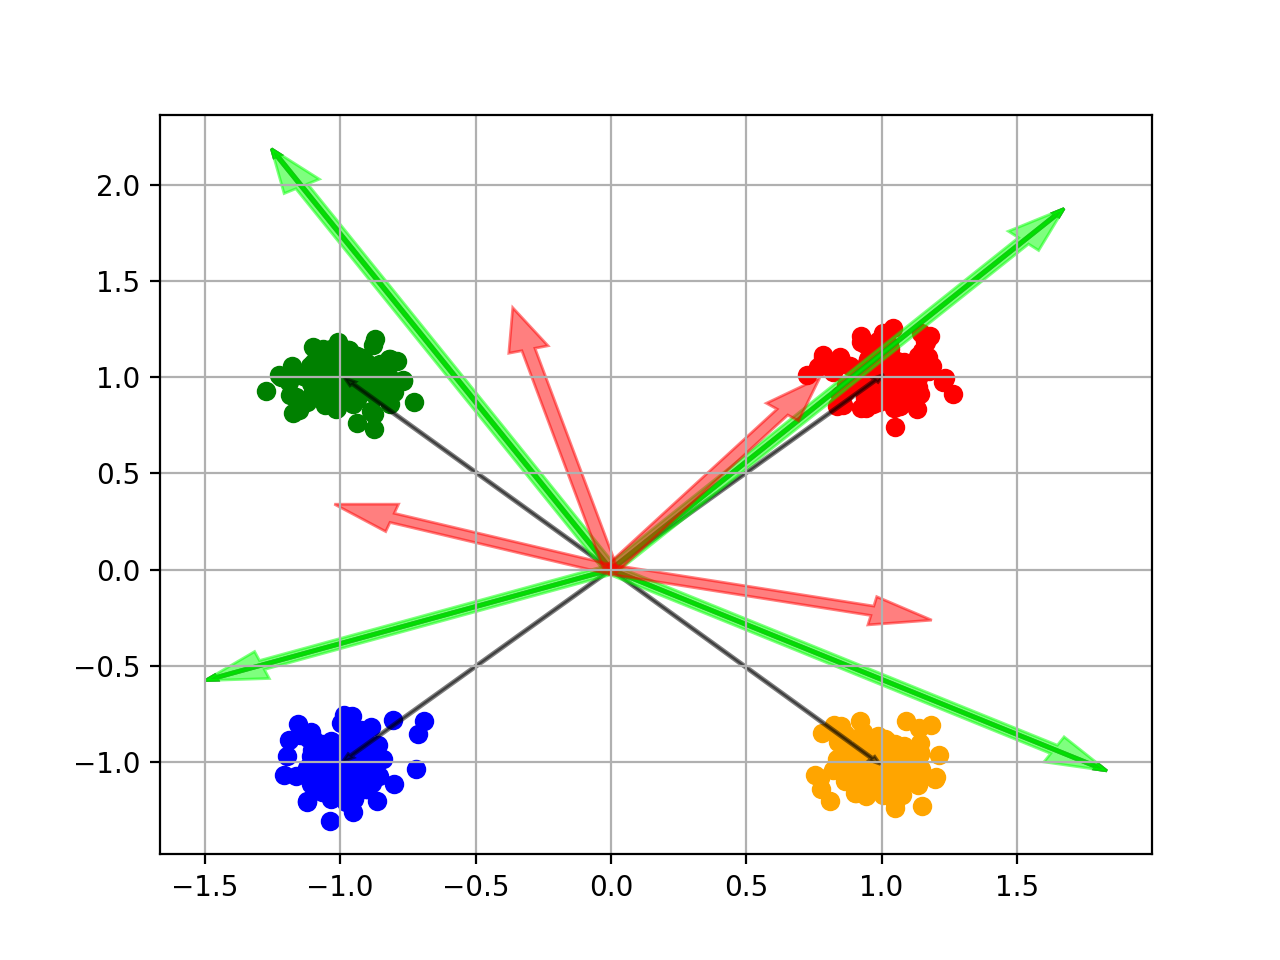

In [6]:
plt.close()
fig, ax = plt.subplots(1)#, sharex='col', sharey='row', gridspec_kw={'wspace': 0})

colors = ['red','green','blue','orange']
means = np.mean(np.reshape(data,(4,int(data.shape[0]/4),data.shape[-1])),axis=1)
cluster_N = int(data.shape[0] / 4)
for color,mean,i in zip(colors,means,range(len(colors))):
    ax.scatter(data[i*cluster_N:(i+1)*cluster_N,0],data[i*cluster_N:(i+1)*cluster_N,1],color=color)
    ax.arrow(0,0,mean[0],mean[1],length_includes_head=True,width=0.01,color=(0,0,0,0.5))
ax.grid('on')

# Initialise DL-model

In [15]:
num_categories = 4 # four data clusters
model = MindReader(num_categories)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss func
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics to monitor
)

# Build (by specifying input_shape) and summarize model
mb_size = 32
input_shape = [mb_size,data.shape[-1]]
model.build(input_shape)
model.summary()

Model: "mind_reader_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  8         
_________________________________________________________________
softmax_2 (Softmax)          multiple                  0         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [16]:
IW = InspectWeights()
model.fit(x=data,y=labels,batch_size=32,epochs=100,validation_split=0.1,shuffle=True,callbacks=[IW])

Epoch 1/100
15/15 [==============================] - 0s 14ms/step - loss: 1.1758 - sparse_categorical_accuracy: 0.4315 - val_loss: 0.5277 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1368 - sparse_categorical_accuracy: 0.4432 - val_loss: 0.5159 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.1079 - sparse_categorical_accuracy: 0.4536 - val_loss: 0.5056 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0793 - sparse_categorical_accuracy: 0.4610 - val_loss: 0.4950 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0611 - sparse_categorical_accuracy: 0.4535 - val_loss: 0.4850 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 1.0522 - sparse_categorical_acc

15/15 [==============================] - 0s 3ms/step - loss: 0.4356 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2096 - val_sparse_categorical_accuracy: 1.0000
Epoch 47/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4347 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2050 - val_sparse_categorical_accuracy: 1.0000
Epoch 48/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4113 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2012 - val_sparse_categorical_accuracy: 1.0000
Epoch 49/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4129 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1973 - val_sparse_categorical_accuracy: 1.0000
Epoch 50/100
15/15 [==============================] - 0s 3ms/step - loss: 0.4048 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.1931 - val_sparse_categorical_accuracy: 1.0000
Epoch 51/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3910 - sparse_categorical_accuracy: 1

15/15 [==============================] - 0s 3ms/step - loss: 0.1432 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0816 - val_sparse_categorical_accuracy: 1.0000
Epoch 92/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1400 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0799 - val_sparse_categorical_accuracy: 1.0000
Epoch 93/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1363 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0782 - val_sparse_categorical_accuracy: 1.0000
Epoch 94/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1343 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0767 - val_sparse_categorical_accuracy: 1.0000
Epoch 95/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1286 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0751 - val_sparse_categorical_accuracy: 1.0000
Epoch 96/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1260 - sparse_categorical_accuracy: 1

In [27]:
IW.weight_history[-1][0].shape

(2, 4)

In [34]:
for i in range(4):
    ax.arrow(0,0,*IW.weight_history[37][0][:,i],length_includes_head=True,width=0.05,color=(1,0,0,0.5))

<IPython.core.display.Javascript object>


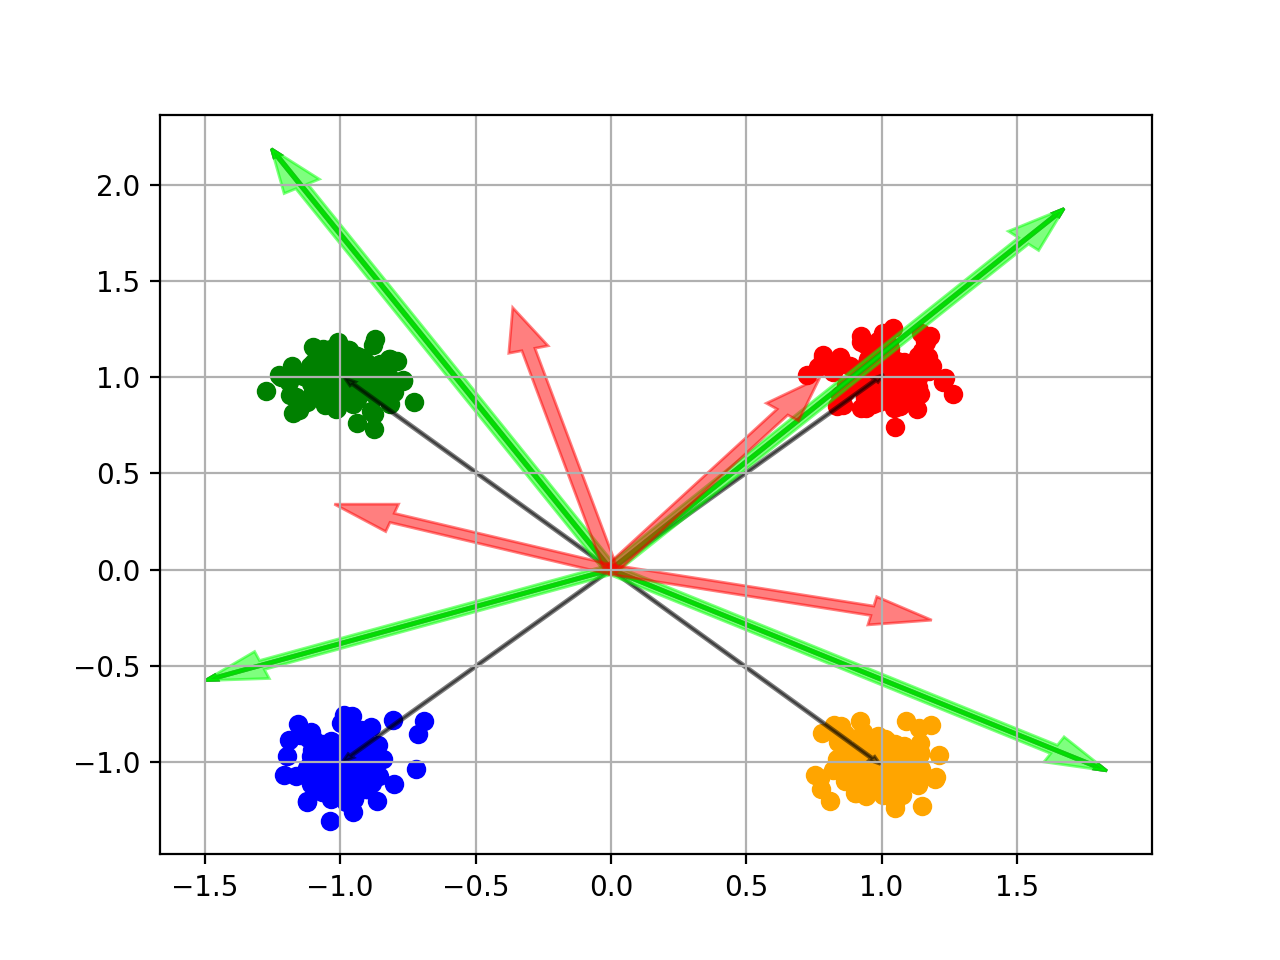

In [31]:
fig

In [ ]:
def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,

In [ ]:
ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                              fargs=(color_data, scat))

